# Lego wall dataset: load data and plot wall designs
nach Meeting am 2024-07-12, symmetrische 8x7 designs (8 Noppen breit und 7 Steinhöhen hoch)

In [1]:
import os, json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('lego_wall_res.json','r') as f:
    res_dict = json.load(f)

In [3]:
res_dict;

In [4]:
res_array = np.array([[int(key),val['E_wk'],val['E_kin'],val['E_fric'],] for key,val in res_dict.items()])

### Designs with highest $E_{wk}$, $E_{kin}$, and $E_{fric}$ 

In [5]:
# E_wk
res_array[np.argsort(res_array[:,1])]

array([[2465.    , 1705.1619, 1461.5092,  228.0317],
       [3157.    , 1706.9235, 1245.9888,  414.279 ],
       [2571.    , 1736.5341, 1499.6248,  219.4206],
       ...,
       [2114.    , 6971.9927, 5701.4614, 1129.9875],
       [2757.    , 7082.1768, 5787.6919, 1143.0367],
       [2432.    , 7155.5566, 5826.0688, 1184.4623]], shape=(5281, 4))

In [6]:
# E_kin
res_array[np.argsort(res_array[:,2])]

array([[4475.    , 2495.0208,  935.0997, 1153.9707],
       [4360.    , 2304.2351,  950.1131, 1132.1249],
       [4502.    , 2471.3235,  981.6004, 1127.2291],
       ...,
       [2757.    , 7082.1768, 5787.6919, 1143.0367],
       [5122.    , 6924.7778, 5796.3003,  971.7935],
       [2432.    , 7155.5566, 5826.0688, 1184.4623]], shape=(5281, 4))

In [7]:
# E_fric
res_array[np.argsort(res_array[:,3])]

array([[2601.    , 1737.0819, 1499.2583,  218.9225],
       [2571.    , 1736.5341, 1499.6248,  219.4206],
       [2545.    , 1738.4836, 1501.7438,  224.238 ],
       ...,
       [3145.    , 5548.7573, 3021.8074, 2039.3103],
       [3207.    , 5308.4453, 2814.397 , 2048.4253],
       [3054.    , 5493.1191, 3002.9175, 2048.8899]], shape=(5281, 4))

## Plot the wall designs

In [8]:
# Lego colors from bricklink (only solid colors): https://www.bricklink.com/catalogColors.asp
cm_lego = {'Light Bluish Gray': 'a5acbf', 'Bright Green': '00c23b', 'Yellow': 'ffda32','Medium Blue': '71a4d0','Light Lime': 'e9eab8','Medium Orange': 'ff9a38','Magenta': 'b52469', 'Medium Lavender': 'c280d0'}

col_dict = {1:'Light Bluish Gray',2:'Bright Green',3:'Yellow',4:'Medium Blue',
            5:'Light Lime',6:'Medium Orange',7:'Magenta',8:'Medium Lavender'}

col_set = {i:'#'+cm_lego[j] for i,j in col_dict.items()}

In [9]:
def plot_wall(wall_des,out_name='',if_show=1):
    b0, h0 = 8.,9.6

    def get_bricks(row):
        # function for getting brick lengths from 0,1 list (one row)
        brick_list = []
        i_temp = 1
        for is_con in row:
            if is_con == 1:
                i_temp += 1
            else:
                brick_list += [i_temp]
                i_temp = 1
        brick_list += [i_temp]
        return brick_list

    def make_bricks(wall):
        wall_bricks = []
        for row in wall:
            wall_bricks += [get_bricks(row)]
        return wall_bricks

    # also make the full design from the right side
    wall_bricks = make_bricks(np.append(np.array(wall_des)[:,:0:-1],np.array(wall_des),axis=1))

    fig, ax = plt.subplots(figsize=(0.4,0.4))

    for i_row,row in enumerate(wall_bricks[::-1]):
        x0 = 0
        for brick_i in row:
            ax.add_patch(plt.Rectangle((x0,i_row*h0),brick_i*b0,h0,
                        facecolor=col_set[brick_i],edgecolor='k',linewidth=0.5))
            x0 += brick_i*b0

    plt.axis('equal')
    plt.axis('off')
    plt.tight_layout(pad=0)
    if out_name != '':
        plt.savefig(out_name+'.png',dpi=130)
    if if_show:
        plt.show()
    plt.close(fig)

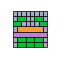

In [10]:
plot_wall(res_dict[str(2432)]['wall_right'],'design_max_wk_kin',1)

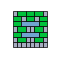

In [11]:
plot_wall(res_dict[str(3054)]['wall_right'],'design_max_fric',1)

In [12]:
for key,design in res_dict.items():
    plot_wall(design['wall_right'],'images/all_designs/design-'+key.zfill(4),0)

## Write image strings for the readme with all images

In [1]:
str_img = '![](all_designs/design-0001.png)'

In [2]:
str_full = ''
for i in range(1,5282):
    str_full += str_img.replace('0001',str(i).zfill(4))
str_full

'![](all_designs/design-0001.png)![](all_designs/design-0002.png)![](all_designs/design-0003.png)![](all_designs/design-0004.png)![](all_designs/design-0005.png)![](all_designs/design-0006.png)![](all_designs/design-0007.png)![](all_designs/design-0008.png)![](all_designs/design-0009.png)![](all_designs/design-0010.png)![](all_designs/design-0011.png)![](all_designs/design-0012.png)![](all_designs/design-0013.png)![](all_designs/design-0014.png)![](all_designs/design-0015.png)![](all_designs/design-0016.png)![](all_designs/design-0017.png)![](all_designs/design-0018.png)![](all_designs/design-0019.png)![](all_designs/design-0020.png)![](all_designs/design-0021.png)![](all_designs/design-0022.png)![](all_designs/design-0023.png)![](all_designs/design-0024.png)![](all_designs/design-0025.png)![](all_designs/design-0026.png)![](all_designs/design-0027.png)![](all_designs/design-0028.png)![](all_designs/design-0029.png)![](all_designs/design-0030.png)![](all_designs/design-0031.png)![](all